To perform statistical entropy analysis in Python for EEG data, you can use libraries such as nolds or pyEEG. These libraries provide functions to calculate different types of entropy measures, including approximate entropy (ApEn), sample entropy (SampEn), and permutation entropy (PermEn)

Shannon Entropy: Shannon entropy is a widely used measure of uncertainty or information content in a signal. It quantifies the amount of information or randomness present in the signal. It can be useful for analyzing the overall complexity of EEG signals.

Approximate Entropy (ApEn): Approximate entropy is a measure of regularity or complexity in time series data. It quantifies the likelihood that similar patterns repeat in the signal. ApEn can be helpful in assessing the complexity of EEG signals and detecting changes in regularity.

Sample Entropy (SampEn): Sample entropy is a variation of approximate entropy that addresses some limitations of ApEn. It measures the likelihood of similar patterns repeating in a signal while also taking into account self-matches of shorter patterns. SampEn can provide insights into the complexity and irregularity of EEG signals.

Renyi Entropy: Renyi entropy is a generalization of Shannon entropy that includes a parameter to control the level of sensitivity to different probability distributions. It provides a measure of the diversity or variability in the signal.

Permutation Entropy: Permutation entropy measures the amount of disorder or randomness in the order of patterns in a signal. It considers the relative order of values rather than their actual magnitudes. Permutation entropy can be useful in characterizing the complexity and irregularity of EEG signals.

-----------
Permutation Entropy
----------

In [4]:
#---------SHANNON ENTROPY

import numpy as np
from scipy.stats import entropy
import mne, os
import  nolds# pyeeg,
from mne import Epochs
from nolds import sampen
from pyentrp import entropy as py_entropy
import mne

mne.set_log_level("ERROR")
raw_folder = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data_ordered', 'mne_raw')
raw_files = [file for file in os.listdir(raw_folder) if file.endswith(".fif")]
marker_mapping = {"blue": 1, "red": 2, "right": 3, "left": 4, "right arrow": 5, "left arrow": 6}
duration = 30.0  # Duration of each epoch (seconds)
event_ids = {'left': 4, 'right': 3}  # Replace with your event IDs
tmin, tmax = -0.3, 0.7
evokeds_left = {}
evokeds_right = {}

entropy_audio = []
entropy_shape = []
entropy_vibro = []

# Process each raw file and extract evoked response
for file in raw_files:
    high_entropy = False
    print("Computing entropy for trial",file)
    raw_path = os.path.join(raw_folder, file)
    raw = mne.io.read_raw_fif(raw_path, preload=True)
    data = raw.get_data()
    events, event_id= mne.events_from_annotations(raw, event_id=marker_mapping)
    epochs = Epochs(raw, events=events, event_id=event_ids, tmin=-0.3, tmax=0.7, baseline=None, preload=True)
    m = 2  # embedding dimension
    r = 0.2 * np.std(raw.get_data())  # tolerance threshold
    # Compute entropy for each channel
    entropy_values = []
    #for channel_data in data:
    for ch_name in event_ids.keys():
        #channel_entropy = entropy(np.abs(channel_data))
        #channel_entropy = pyeeg.ap_entropy
        channel_data = epochs[ch_name].get_data().reshape(-1)
        #channel_entropy = sampen(channel_data, m, r)
        channel_entropy = py_entropy.permutation_entropy(channel_data, 3, 1)
        #channel_entropy = entropy(channel_data)
        
        entropy_values.append(channel_entropy)

    # Print the entropy values for each channel
    for channel_idx, entropy_value in enumerate(entropy_values):
        print(f'Channel {channel_idx + 1}: {entropy_value}')
        #if entropy_value > 12:
        #    high_entropy = True
            
    if not high_entropy:
        if not np.any(np.isnan(entropy_values)):
            if "Shape" in file:
                entropy_shape.append(entropy_values)   
            elif "Audio" in file:
                entropy_audio.append(entropy_values) 
            elif "Vibro" in file:
                entropy_vibro.append(entropy_values) 


Computing entropy for trial AudioVisual_01_1.fif
Channel 1: 2.0594637973315515
Channel 2: 2.053214296045125
Computing entropy for trial AudioVisual_01_2.fif
Channel 1: 2.0518169579818744
Channel 2: 2.0651459697270087
Computing entropy for trial AudioVisual_02_1.fif
Channel 1: 2.077795874260744
Channel 2: 2.077007878417794
Computing entropy for trial AudioVisual_03_1.fif
Channel 1: 1.9804709633668907
Channel 2: 1.9818876366155638
Computing entropy for trial AudioVisual_03_2.fif
Channel 1: 2.0003721376860035
Channel 2: 2.0019369745178377
Computing entropy for trial AudioVisual_04_1.fif
Channel 1: 1.9761254128987569
Channel 2: 1.9789732728392238
Computing entropy for trial AudioVisual_04_2.fif
Channel 1: 1.952969948702467
Channel 2: 1.959036219907956
Computing entropy for trial AudioVisual_05_1.fif
Channel 1: 2.0065087204483216
Channel 2: 2.014601880045433
Computing entropy for trial AudioVisual_05_2.fif
Channel 1: 2.0248513661083773
Channel 2: 2.0298199678765245
Computing entropy for tri

(38,)
Variables saved to JSON file: entropy.json
Audio 2.0111770644708686 0.05544624159576584
Vibro 2.0084572898794475 0.08846767193646826
Shape 1.9846937683359025 0.12532313968682718


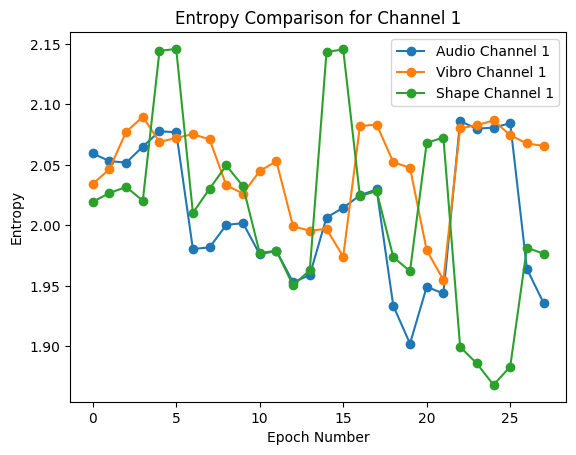

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import json

entropy_audio = np.array(entropy_audio)
audio_entropy_mean = np.mean(entropy_audio)
audio_entropy_std = np.std(entropy_audio)
print(entropy_audio.shape)
entropy_vibro = np.array(entropy_vibro)
vibro_entropy_mean = np.mean(entropy_vibro)
vibro_entropy_std = np.std(entropy_vibro)
#print(entropy_vibro)
entropy_shape = np.array(entropy_shape)
shape_entropy_mean = np.mean(entropy_shape)
shape_entropy_std = np.std(entropy_shape)
entropy_audio = entropy_audio[np.isfinite(entropy_audio)]
entropy_vibro = entropy_vibro[np.isfinite(entropy_vibro)]
entropy_shape = entropy_shape[np.isfinite(entropy_shape)]
#print(entropy_shape)
json_file_path = 'entropy.json'
entropy = {"Audio": entropy_audio.tolist(), "Vibro": entropy_vibro.tolist(), "Shape": entropy_shape.tolist()}
entropy = (np.array(entropy).shape)
# Save the variables to a JSON file
with open(json_file_path, 'w') as file:
    json.dump(entropy, file, indent=4)
print("Variables saved to JSON file:", json_file_path)

print("Audio", audio_entropy_mean, audio_entropy_std)
print("Vibro", vibro_entropy_mean, vibro_entropy_std)
print("Shape", shape_entropy_mean, shape_entropy_std)

#num_channels = entropy_audio.shape[1]

# Generate x-axis values (assuming equal length arrays)
x = np.arange(28)

# Plotting for each channel
#for channel in range(1):
channel = 0
plt.plot(x, entropy_audio[:28], label=f'Audio Channel {channel+1}', marker='o')
plt.plot(x, entropy_vibro[:28], label=f'Vibro Channel {channel+1}', marker='o')
plt.plot(x, entropy_shape[:28], label=f'Shape Channel {channel+1}', marker='o')

# Add labels, title, and legend for each plot
plt.xlabel('Epoch Number')
plt.ylabel('Entropy')
plt.title(f'Entropy Comparison for Channel {channel+1}')
plt.legend()

# Show the plot
plt.show()

-------
Statistical Analysis SE
--------

In [13]:
import scipy.stats as stats
from scipy.stats import f_oneway
# Perform the Brown-Forsythe test
num_channels = 2#entropy_audio.shape[1]

# Generate x-axis values (assuming equal length arrays)
x = np.arange(14)

print("A-V")
# Plotting for each channel
for channel in range(num_channels):
    init=channel*14
    end = 14*(channel+1)
    _, p_value = stats.levene(entropy_audio[init:end], entropy_vibro[init:end], center='median')

    # Print the results
    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
    else:
        print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

    f_value, p_value = f_oneway(entropy_audio[init:end], entropy_vibro[init:end])

    print(f"ANOVA results for {channel}")
    print("p-values:", p_value )

print("A-S")
# Plotting for each channel
for channel in range(num_channels):
    init=channel*14
    end = 14*(channel+1)
    _, p_value = stats.levene(entropy_audio[init:end], entropy_shape[init:end], center='median')

    # Print the results
    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
    else:
        print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

    f_value, p_value = f_oneway(entropy_audio[init:end], entropy_shape[init:end])

    print(f"ANOVA results for {channel}")
    print("p-values:", p_value )

print("S-V")
# Plotting for each channel
for channel in range(num_channels):
    init=channel*14
    end = 14*(channel+1)
    _, p_value = stats.levene(entropy_shape[init:end], entropy_vibro[init:end], center='median')

    # Print the results
    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
    else:
        print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

    f_value, p_value = f_oneway(entropy_shape[init:end], entropy_vibro[init:end])

    print(f"ANOVA results for {channel}")
    print("p-values:", p_value )


A-V
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.05056979743888171
ANOVA results for 0
p-values: 0.028674196240704046
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.14435159166686
ANOVA results for 1
p-values: 0.05818630711245654
A-S
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.9329398654153511
ANOVA results for 0
p-values: 0.5570741756736485
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.30517006730207813
ANOVA results for 1
p-values: 0.7730039166955739
S-V
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.21500689936365724
ANOVA results for 0
p-values: 0.21627664432989824
The variances are significantly different (p < 0.05), violating the assumption of homogeneous

-------------
Approximate Entropy ApEn
--------------

In [1]:
#------------approximate Entropy ApEn

import numpy as np
import pyeeg

# Load the EEG data as a NumPy array
data = np.loadtxt('eeg_data.txt')

# Compute approximate entropy for each channel
entropy_values = []
for channel_data in data:
    entropy_value = pyeeg.ap_entropy(channel_data)
    entropy_values.append(entropy_value)

# Print the entropy values for each channel
for channel_idx, entropy_value in enumerate(entropy_values):
    print(f'Channel {channel_idx + 1}: {entropy_value}')


ModuleNotFoundError: No module named 'pyeeg'

In [ ]:
import numpy as np
from nolds import entropy
import mne

# Load the EEG data using MNE Raw object
raw = mne.io.read_raw_edf('your_eeg_file.edf', preload=True)

# Extract the data as a NumPy array
data = raw.get_data()

# Compute statistical entropy for each channel
entropy_values = []
for channel_data in data:
    entropy_value = entropy(channel_data, emb_dim=10, r=0.1)
    entropy_values.append(entropy_value)

# Print the entropy values for each channel
for channel_idx, entropy_value in enumerate(entropy_values):
    print(f'Channel {channel_idx + 1}: {entropy_value}')
